In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [4]:
batch_size = 100

input_img = Input((28, 28, 1))
x = Flatten()(input_img) # вытягиваем изображение в один вектор
x = Dense(128, activation='relu')(x)  # подаем его на вход нейронной сети
x = Dense(64, activation='relu')(x)
encoded = Dense(49, activation='relu')(x) # вектор скрытого состояния
# Далее начинаем восстанавливать изображение
d = Dense(64, activation='relu')(encoded)
d = Dense(28 * 28, activation='sigmoid')(d) # sigmoid - т.к нужно данные значением от 0 до 1 ( начальные данные таких же значений)
decoded = Reshape((28, 28, 1))(d) # меняем размерность на 28х28 пикселей

autoencoder = keras.Model(input_img, decoded, name="autoencoder") # Model( коллекция входных слоев коллекция выходных слоев, имя = автоэнкодер)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [5]:
autoencoder.fit(x_train, x_train, # на вход и на выход подается один и тот же сигнал
                epochs=20,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0448
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0207
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0167
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0148
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0132
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0121
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0114
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0108
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0103
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0100
Epoch 11/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0096
Epoch 12/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0093
Epoch 13/20
600/600 [====

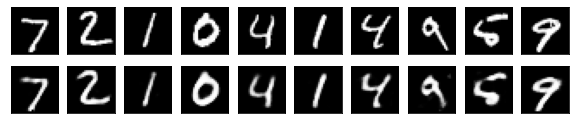

In [6]:
# отображаем 1е 10 изображений из выборки и результат 
n = 10

imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

plt.figure(figsize=(n, 2))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(imgs[i].squeeze(), cmap='gray') # squeeze - удаляет размерность (цветовой канал 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax2 = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

plt.show()

In [7]:
def plot_digits(*images): # отображает изображение в консоли 
    images = [x.squeeze() for x in images]
    n = images[0].shape[0]  # определяет число изображений

    plt.figure(figsize=(n, len(images)))
    for j in range(n):
        for i in range(len(images)):
            ax = plt.subplot(len(images), n, i * n + j + 1)
            plt.imshow(images[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()
    
def plot_homotopy(frm, to, n=10, autoencoder=None): # совершает движение либо по прямой, либо по кривой
    # frm - начальное изображение, to - конечное изображение, n - количество изображений
    # Если не указан автоэнкодер -> по прямой. Иначе - по модели, которую определила нейронная сеть
    z = np.zeros(([n] + list(frm.shape)))  
    for i, t in enumerate(np.linspace(0., 1., n)):
        z[i] = frm * (1 - t) + to * t  # Гомотопия по прямой
    if autoencoder:
        plot_digits(autoencoder.predict(z, batch_size=n))
    else:
        plot_digits(z)

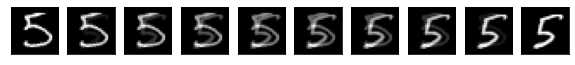

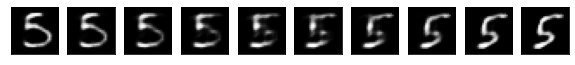

In [8]:
frm, to = x_test[y_test == 5][1:3]
plot_homotopy(frm, to)
plot_homotopy(frm, to, autoencoder=autoencoder)